<a href="https://colab.research.google.com/github/Yakagi17/Transfer_Learning_FGA_UII/blob/master/CNN_vs_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# MNIST Dataset 


Make sure this Colab runs on GPU


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

---
## Load MNIST Dataset 





In [0]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
# http://yann.lecun.com/exdb/mnist/
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


---
## MNIST Dataset Visualization


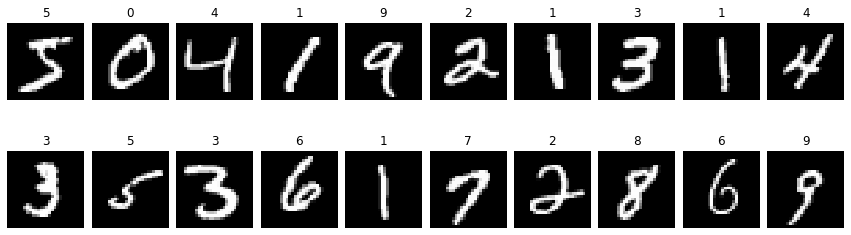

In [0]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

In [0]:
np.shape(X_train[1])

(28, 28)

---
## Data Splitting (Validation and Train)


In [0]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 28, 28)
y_val.shape   = (10000,)
X_train.shape = (50000, 28, 28)
y_train.shape = (50000,)


---
## Data Preparation

In [0]:
# a batch of image as input
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train = np.expand_dims(X_train,-1)
X_val = np.expand_dims(X_val,-1)
X_test = np.expand_dims(X_test,-1)

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)


X_train.shape = (50000, 28, 28, 1)
X_val.shape   = (10000, 28, 28, 1)
X_test.shape  = (10000, 28, 28, 1)


---
## One Hot Matrix



 `y_train`, `y_val`, dan `y_test` vector are converted to One-Hot Matrix

In [0]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (50000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---

# Three-Layer Neural Network

3-layer Artificial Neural Network is built to classify MNIST datasets

---
## Import Module



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

---
## Neural Network Model 


In [0]:
# create model compact sequential (https://www.tensorflow.org/guide/keras/overview)

model_ann = Sequential([
  Flatten(input_shape=(28,28,1)),
  Dense(500, activation="relu"),
  Dense(200, activation="relu"),
  Dense(num_classes, activation="softmax")
])

model_ann.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


---
## Training

In [0]:
# Compile model
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000 
hist_ann = model_ann.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 - 2s - loss: 11.2170 - acc: 0.8057 - val_loss: 1.5661 - val_acc: 0.9131
Epoch 2/15
50000/50000 - 0s - loss: 1.0463 - acc: 0.9251 - val_loss: 0.8897 - val_acc: 0.9266
Epoch 3/15
50000/50000 - 0s - loss: 0.5518 - acc: 0.9470 - val_loss: 0.6981 - val_acc: 0.9356
Epoch 4/15
50000/50000 - 0s - loss: 0.3220 - acc: 0.9619 - val_loss: 0.6558 - val_acc: 0.9399
Epoch 5/15
50000/50000 - 0s - loss: 0.2127 - acc: 0.9705 - val_loss: 0.5762 - val_acc: 0.9453
Epoch 6/15
50000/50000 - 0s - loss: 0.1412 - acc: 0.9775 - val_loss: 0.5715 - val_acc: 0.9465
Epoch 7/15
50000/50000 - 0s - loss: 0.0877 - acc: 0.9836 - val_loss: 0.5390 - val_acc: 0.9478
Epoch 8/15
50000/50000 - 0s - loss: 0.0518 - acc: 0.9887 - val_loss: 0.5139 - val_acc: 0.9504
Epoch 9/15
50000/50000 - 0s - loss: 0.0345 - acc: 0.9917 - val_loss: 0.5150 - val_acc: 0.9507
Epoch 10/15
50000/50000 - 0s - loss: 0.0236 - acc: 0.9935 - val_loss: 0.5235 - val_acc: 0.9514
Epoch 11

---
## Evaluation


In [0]:
scores_ann = model_ann.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_ann[1]*100))

10000/10000 [==============================] - 1s 78us/sample - loss: 0.5324 - acc: 0.9531

Model Accuracy: 95.31%


---

# Three-Layer Convolutional Neural Network
3-layer Convolutional Neural Network is built to classify MNIST datasets


---
## Import Module



In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

---
## Convolutional Neural Network Model


In [0]:
# create model compact sequential

model_cnn = Sequential([
  Conv2D(32,(5,5),input_shape=(28,28,1), padding='same', activation="relu"),
  Conv2D(32,(5,5), padding='same', activation="relu"),
  MaxPooling2D(),
  Flatten(),
  Dense(num_classes, activation="softmax")
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 89,194
Trainable params: 89,194
Non-trainable params: 0
_________________________________________________________________


---
## Training

In [0]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 - 8s - loss: 3.1773 - acc: 0.7078 - val_loss: 0.2551 - val_acc: 0.9243
Epoch 2/15
50000/50000 - 3s - loss: 0.1945 - acc: 0.9402 - val_loss: 0.1237 - val_acc: 0.9626
Epoch 3/15
50000/50000 - 3s - loss: 0.1148 - acc: 0.9640 - val_loss: 0.0938 - val_acc: 0.9714
Epoch 4/15
50000/50000 - 3s - loss: 0.0841 - acc: 0.9728 - val_loss: 0.0790 - val_acc: 0.9768
Epoch 5/15
50000/50000 - 3s - loss: 0.0657 - acc: 0.9794 - val_loss: 0.0687 - val_acc: 0.9796
Epoch 6/15
50000/50000 - 3s - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0659 - val_acc: 0.9807
Epoch 7/15
50000/50000 - 3s - loss: 0.0472 - acc: 0.9846 - val_loss: 0.0619 - val_acc: 0.9820
Epoch 8/15
50000/50000 - 3s - loss: 0.0409 - acc: 0.9868 - val_loss: 0.0598 - val_acc: 0.9838
Epoch 9/15
50000/50000 - 3s - loss: 0.0349 - acc: 0.9887 - val_loss: 0.0591 - val_acc: 0.9835
Epoch 10/15
50000/50000 - 3s - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0587 - val_acc: 0.9834
Epoch 11/

---
## Evaluation


In [0]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0538 - acc: 0.9844

Model Accuracy: 98.44%


---
# Comparison of ANN and CNN


---
## Number of Parameter

In [0]:
print('ANN model :')
model_ann.summary()

print('\n\nCNN model :')
model_cnn.summary()

ANN model :
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


CNN model :
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
__

**ANN has 4x more parameters than CNN**

In [0]:
print('ANN number of parameter:', f'{ model_ann.count_params():,}')
print('CNN number of parameter:', f'{ model_cnn.count_params():,}')

ANN number of parameter: 494,710
CNN number of parameter: 89,194


---
## Training Result

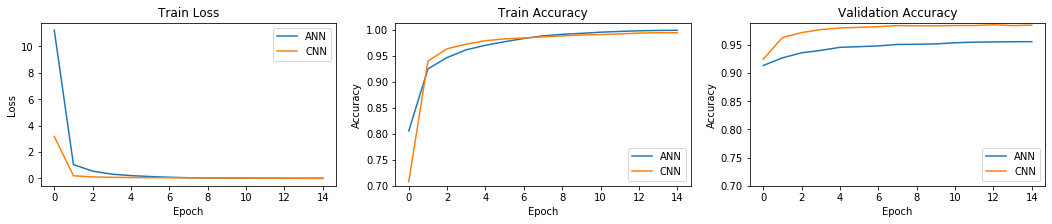

In [0]:
fig, ax = plt.subplots(1,3,figsize=(18,3))

ax[0].plot(hist_ann.history['loss'])
ax[0].plot(hist_cnn.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['ANN', 'CNN'], loc='upper right')

ax[1].plot(hist_ann.history['acc'])
ax[1].plot(hist_cnn.history['acc'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.7)
ax[1].legend(['ANN', 'CNN'], loc='lower right')

ax[2].plot(hist_ann.history['val_acc'])
ax[2].plot(hist_cnn.history['val_acc'])
ax[2].set_title('Validation Accuracy')
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Epoch')
ax[2].set_ylim(bottom=.7)
ax[2].legend(['ANN', 'CNN'], loc='lower right')
plt.show()

---
## Testing Accuracy

In [0]:
print("ANN Accuracy: %.2f%%" % (scores_ann[1]*100))
print("CNN Accuracy: %.2f%%" % (scores_cnn[1]*100))

ANN Accuracy: 95.31%
CNN Accuracy: 98.44%


---
## Overfitting Checking

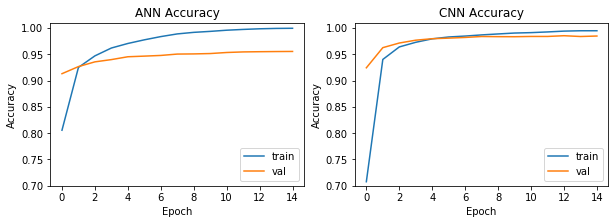

In [0]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_ann.history['acc'])
ax[0].plot(hist_ann.history['val_acc'])
ax[0].set_title('ANN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(.7,1.01)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn.history['acc'])
ax[1].plot(hist_cnn.history['val_acc'])
ax[1].set_title('CNN Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(.7,1.01)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

The greater the gap between training accuracy and validation, the more vulnerable it is to overfitting

<p>https://cognitiveclass.ai/ </p>